# Beijing Air Quality

## Exploratory Data Analysis


### Import packages and data

In [261]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pylab import fill
%matplotlib inline
# Styling Guide
plt.style.use('fivethirtyeight')
sns.set_palette(sns.color_palette("cubehelix", n_colors=12))

df = pd.read_pickle('PKL/full.pkl')
df = df.loc[:'2016-12-31 23:00:00']
df['Month'] = df.index.month
df['Year'] = df.index.year
df['Day'] = df.index.day
df['Hour'] = df.index.hour

### Numerical Analysis

Before we go into the visualizations, let us take a look at the numerical breakdown of the data

In [262]:
df.describe(include = 'all')


,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,Month,Year,Day,Hour
count,403776.000000,403776.000000,403776.000000,403776.000000,403776.000000,403776.00000,403776.000000,403776.000000,403776.000000,403776.000000,403776,403776.000000,403776,403776.000000,403776.000000,403776.000000,403776.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,12,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NE,NaN,Dongsi,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40261,NaN,33648,NaN,NaN,NaN,NaN
mean,79.310815,104.659012,15.820814,50.320564,1219.615002,57.96524,14.085739,1010.285458,3.153178,0.067021,NaN,1.718565,NaN,6.735378,2014.564194,15.748217,11.500000
std,79.317017,90.835945,21.997203,34.831999,1124.244550,57.85325,11.304359,10.356335,13.620931,0.837588,NaN,1.238071,NaN,3.356479,1.097503,8.808891,6.922195
min,2.000000,2.000000,0.285600,1.026500,100.000000,0.21420,-19.900000,982.400000,-43.400000,0.000000,NaN,0.000000,NaN,1.000000,2013.000000,1.000000,0.000000
25%,21.000000,36.875000,2.000000,23.000000,500.000000,10.28160,4.000000,1002.000000,-8.000000,0.000000,NaN,0.900000,NaN,4.000000,2014.000000,8.000000,5.750000
50%,55.000000,83.000000,7.000000,43.000000,900.000000,45.00000,15.400000,1009.800000,4.200000,0.000000,NaN,1.400000,NaN,7.000000,2015.000000,16.000000,11.500000
75%,110.000000,145.000000,19.000000,71.000000,1500.000000,83.00000,23.500000,1018.300000,15.500000,0.000000,NaN,2.200000,NaN,10.000000,2016.000000,23.000000,17.250000


## Looking at the monthly and yearly progression of the weather data

In [263]:
features = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP','RAIN','WSPM']

<AxesSubplot:ylabel='Frequency'>

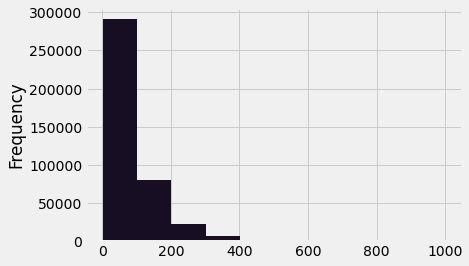

In [243]:
df['PM2.5'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

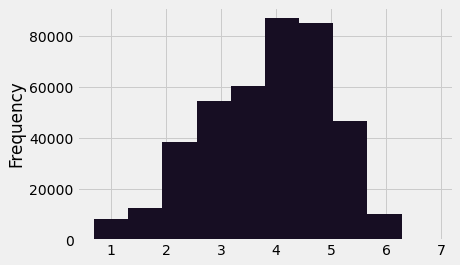

In [244]:
np.log(df['PM2.5']).plot.hist()


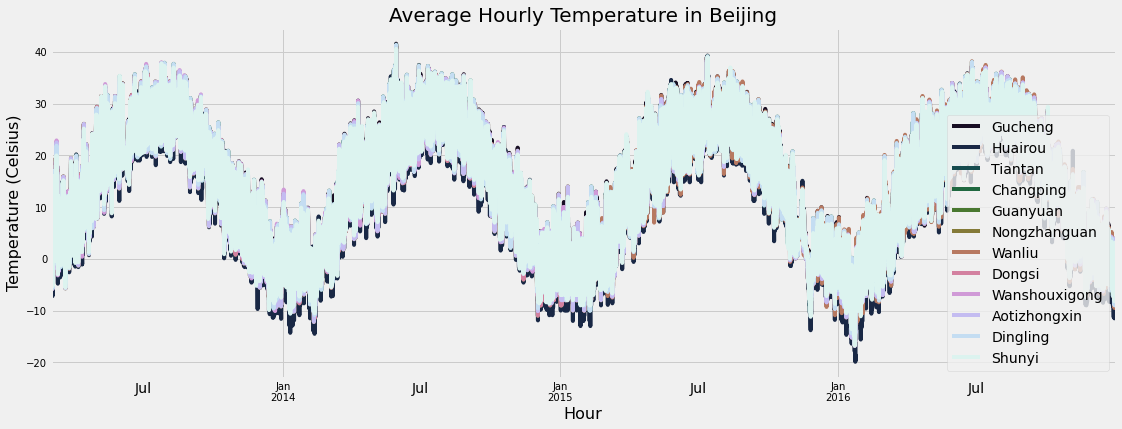

In [265]:
fig, ax = plt.subplots(figsize = (17,6))
for x in df.station.unique():
    df[df['station'].eq(x)]['TEMP'].resample(rule = 'H').mean().plot(label = x)

ax.legend(loc = 'best')
plt.title('Average Hourly Temperature in Beijing', size = 20)
plt.xlabel('Hour', size = 16)
plt.ylabel('Temperature (Celsius)', size = 16)
plt.xticks(size = 10)
plt.yticks(size = 10);

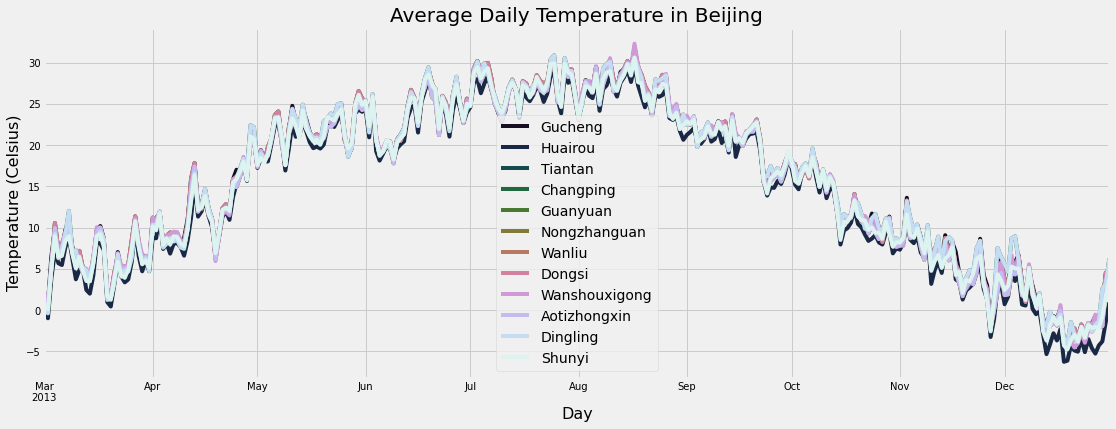

In [269]:
fig, ax = plt.subplots(figsize = (17,6))
for x in df.station.unique():
    df[(df['station'].eq(x)) & ((df['Year'].eq(2013)))]['TEMP'].resample(rule = 'D').mean().plot(label = x)

ax.legend(loc = 'best')
plt.title('Average Daily Temperature in Beijing', size = 20)
plt.xlabel('Day', size = 16)
plt.ylabel('Temperature (Celsius)', size = 16)
plt.xticks(size = 10)
plt.yticks(size = 10);

In [270]:
df.Year.unique()

array([2013, 2014, 2015, 2016])

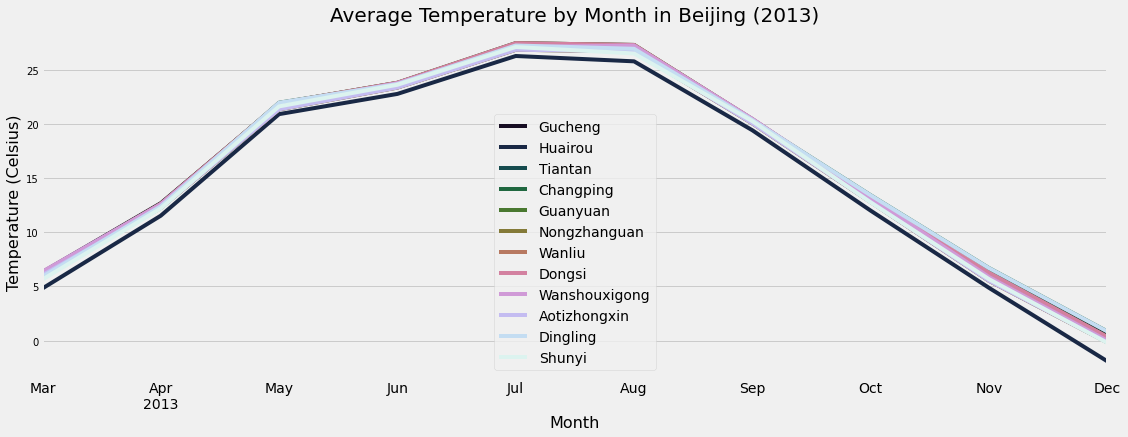

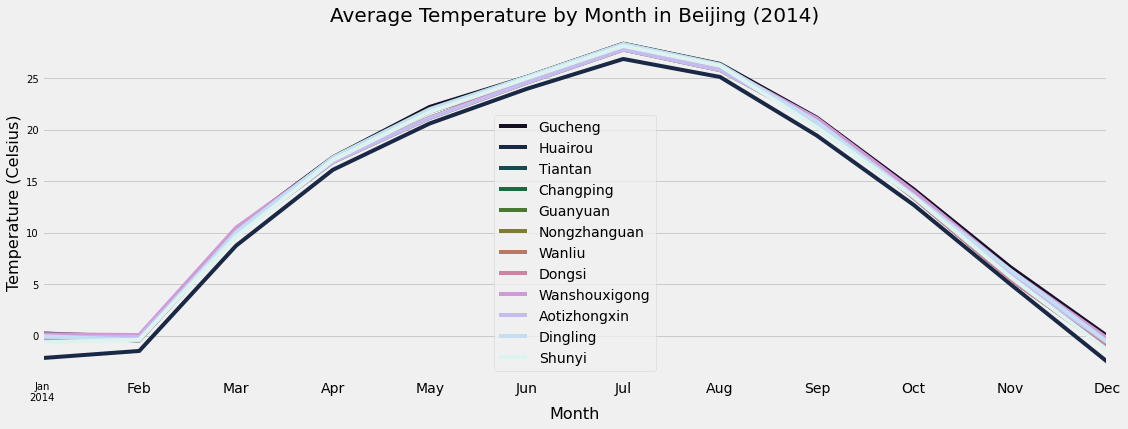

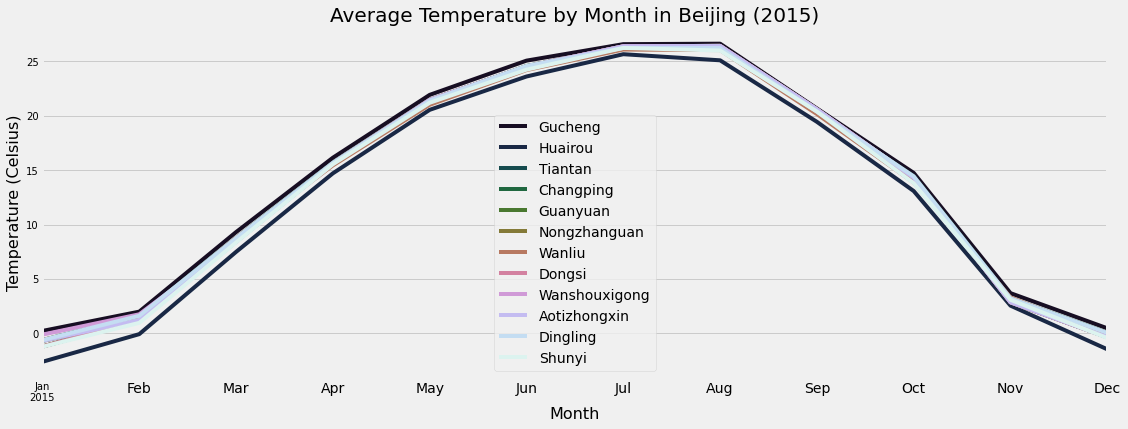

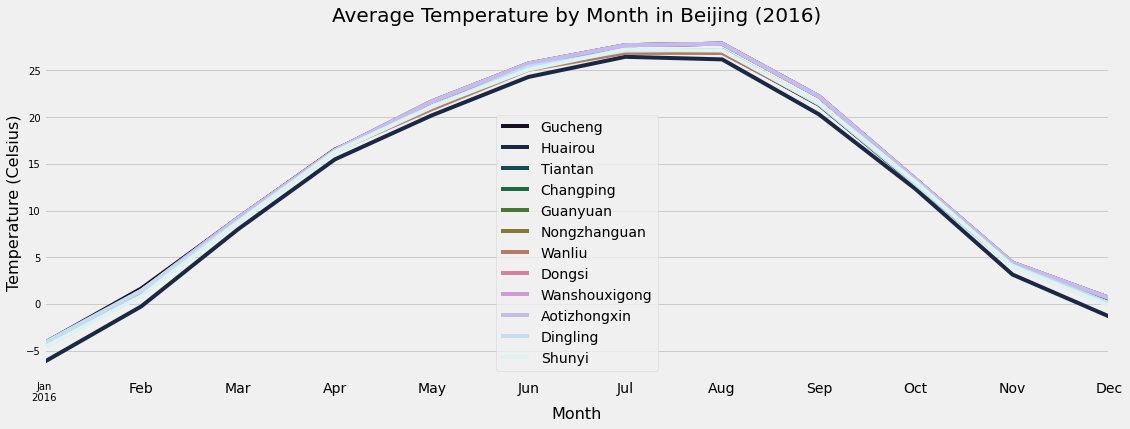

In [274]:
#Average temperature is cyclical


for y in df.Year.unique():
    fig, ax = plt.subplots(figsize = (17,6))
    for x in df.station.unique():
        df[(df['station'].eq(x)) & ((df['Year'].eq(y)))]['TEMP'].resample(rule = 'M').mean().plot(label = x)
        ax.legend(loc = 'best')
        plt.title('Average Temperature by Month in Beijing (' + str(y) +')', size = 20)
        plt.xlabel('Month', size = 16)
        plt.ylabel('Temperature (Celsius)', size = 16)
        plt.xticks(size = 10)
        plt.yticks(size = 10);

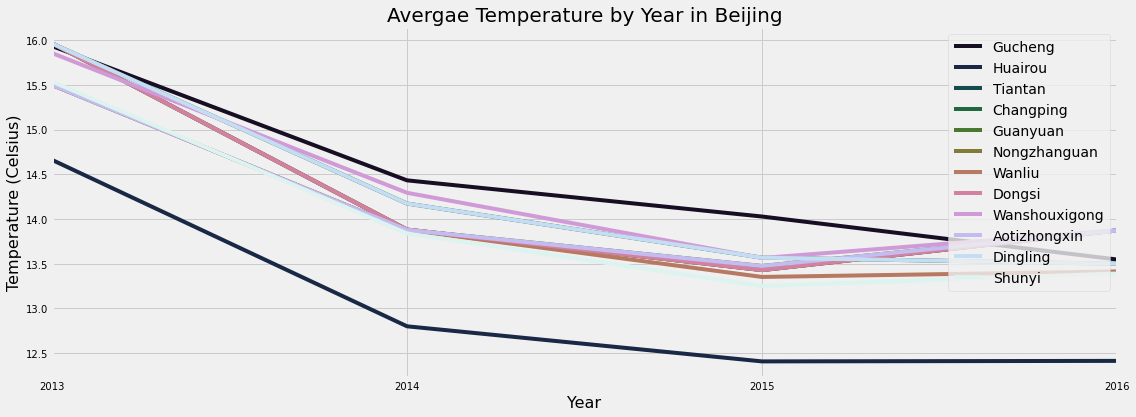

In [220]:
fig, ax = plt.subplots(figsize = (17,6))
for x in df.station.unique():
    df[df['station'].eq(x)]['TEMP'].resample(rule = 'Y').mean().plot(label = x)

ax.legend(loc = 'best')
plt.title('Avergae Temperature by Year in Beijing', size = 20)
plt.xlabel('Year', size = 16)
plt.ylabel('Temperature (Celsius)', size = 16)
plt.xticks(size = 10)
plt.yticks(size = 10);

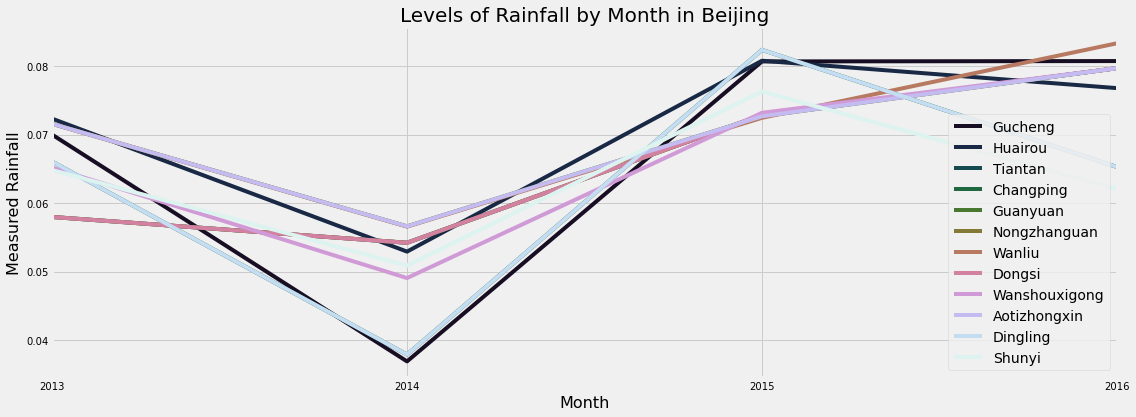

In [221]:
#

fig, ax = plt.subplots(figsize = (17,6))
for x in df.station.unique():
    df[df['station'].eq(x)]['RAIN'].resample(rule = 'Y').mean().plot(label = x)

ax.legend(loc = 'best')
plt.title('Levels of Rainfall by Month in Beijing', size = 20)
plt.xlabel('Month', size = 16)
plt.ylabel('Measured Rainfall', size = 16)
plt.xticks(size = 10)
plt.yticks(size = 10);

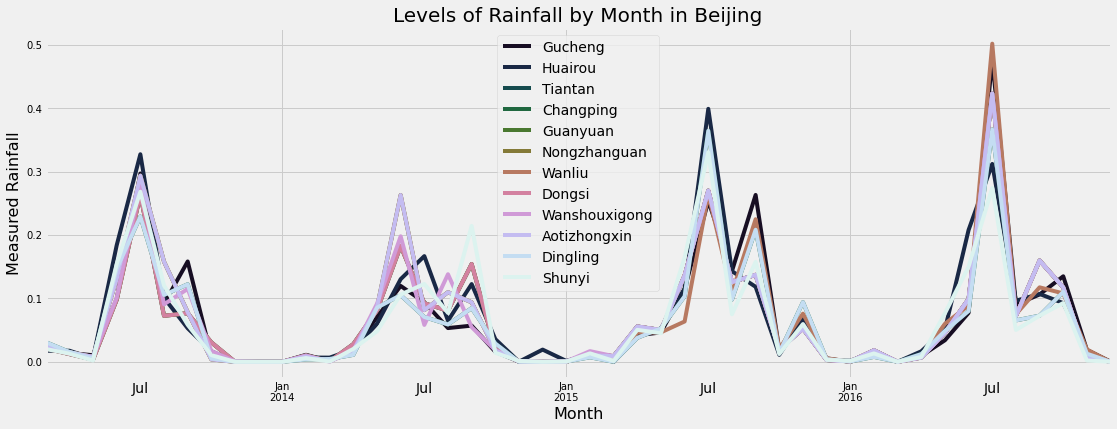

In [222]:
fig, ax = plt.subplots(figsize = (17,6))
for x in df.station.unique():
    df[df['station'].eq(x)]['RAIN'].resample(rule = 'M').mean().plot(label = x)

ax.legend(loc = 'best')
plt.title('Levels of Rainfall by Month in Beijing', size = 20)
plt.xlabel('Month', size = 16)
plt.ylabel('Measured Rainfall', size = 16)
plt.xticks(size = 10)
plt.yticks(size = 10);

In [223]:
stations = ['Gucheng',
 'Huairou',
 'Tiantan',
 'Changping',
 'Guanyuan',
 'Nongzhanguan',
 'Wanliu',
 'Dongsi',
 'Wanshouxigong',
 'Aotizhongxin',
 'Dingling',
 'Shunyi']

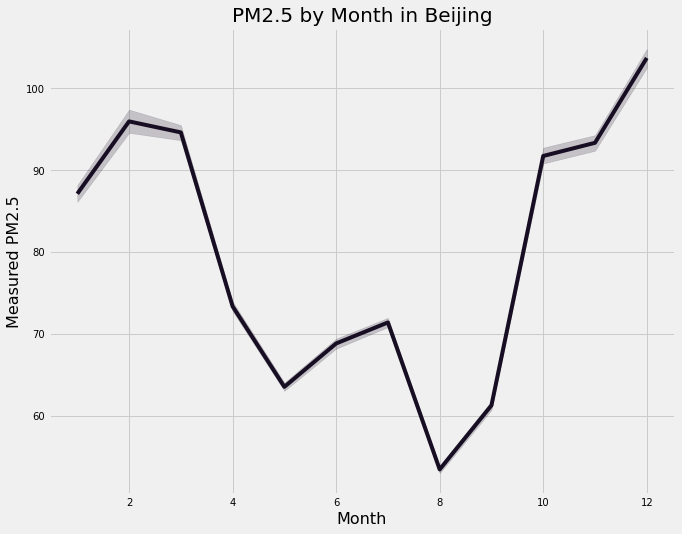

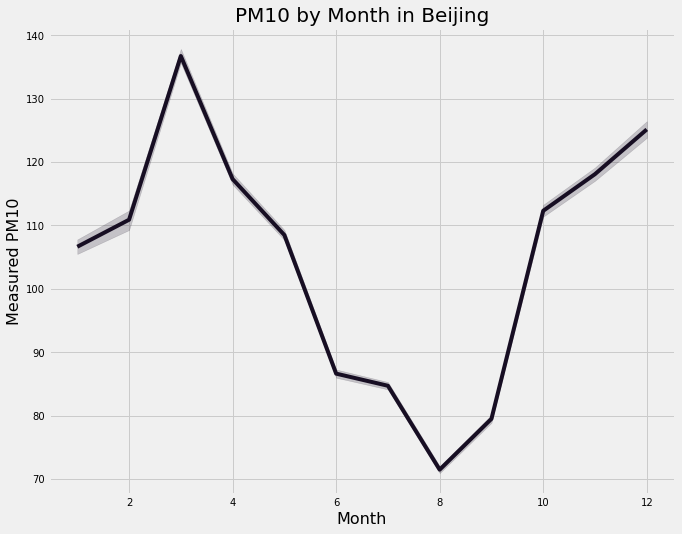

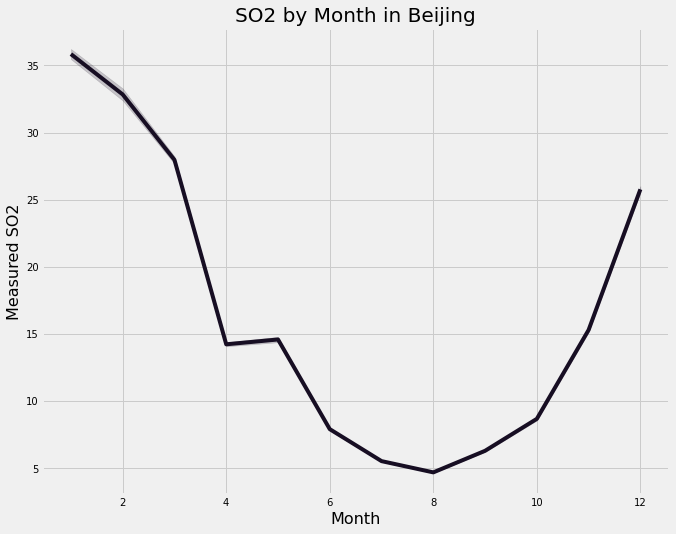

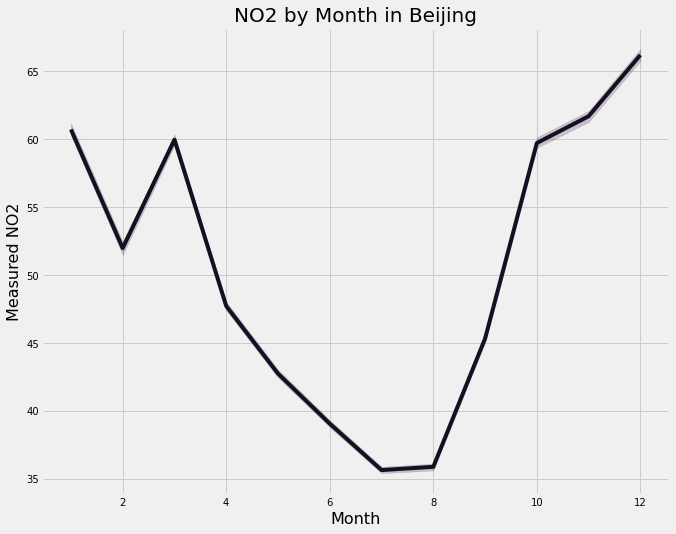

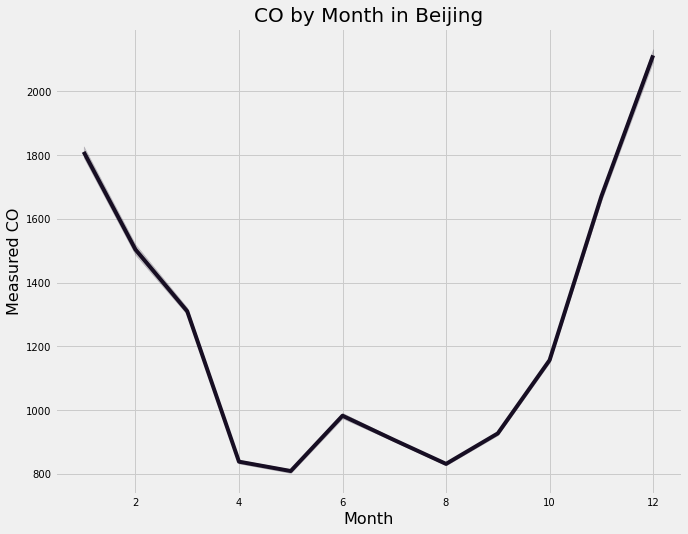

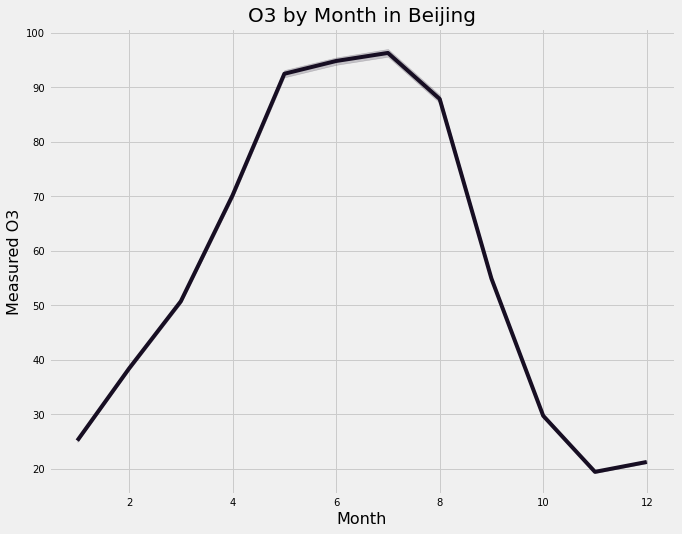

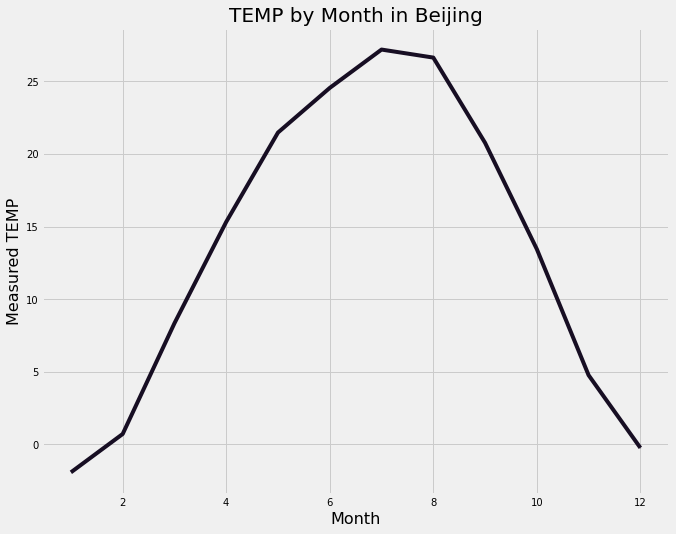

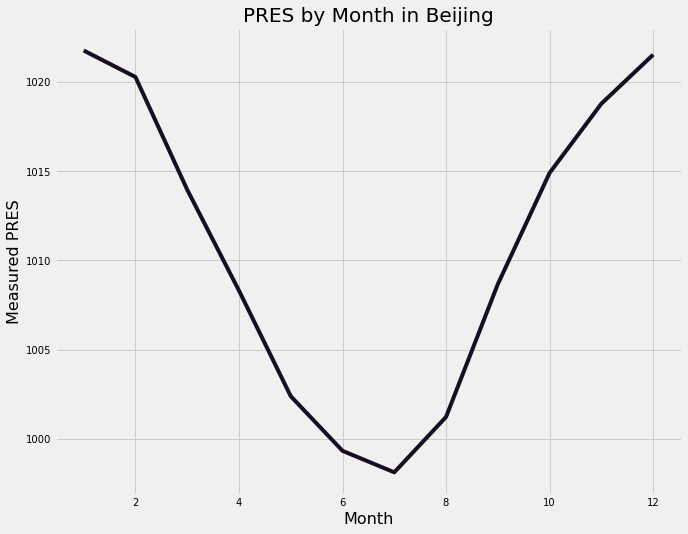

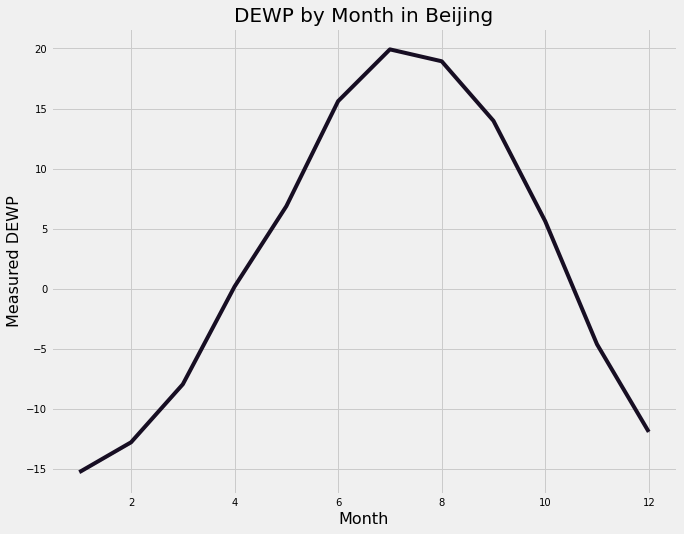

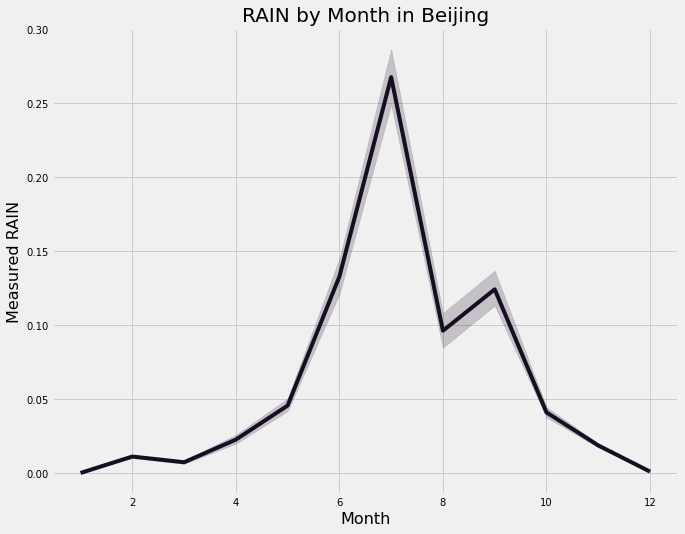

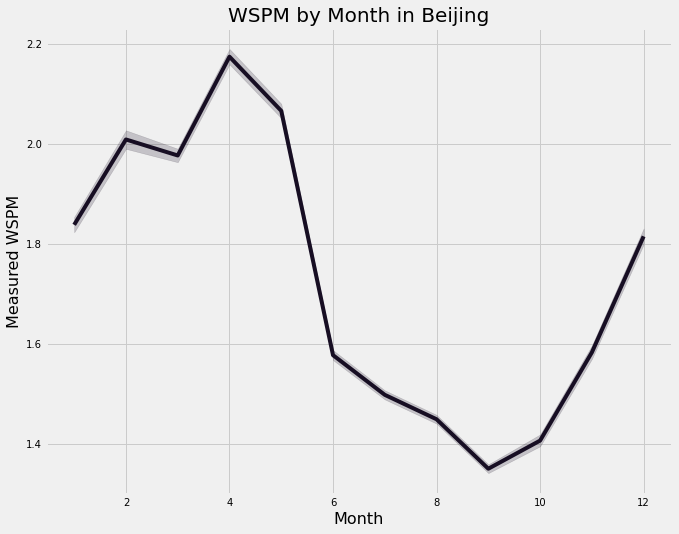

In [224]:
for f in features:
    fig, ax = plt.subplots(figsize=(10, 8))
    sns.lineplot(x = 'Month', y = f, data = df);
    plt.title(f + ' by Month in Beijing', size = 20)
    plt.xlabel('Month', size = 16)
    plt.ylabel('Measured ' + f, size = 16)
    plt.xticks(size = 10)
    plt.yticks(size = 10);

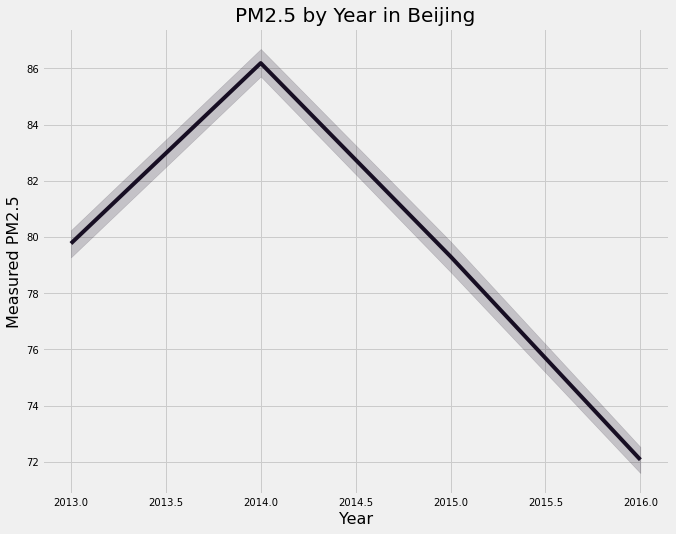

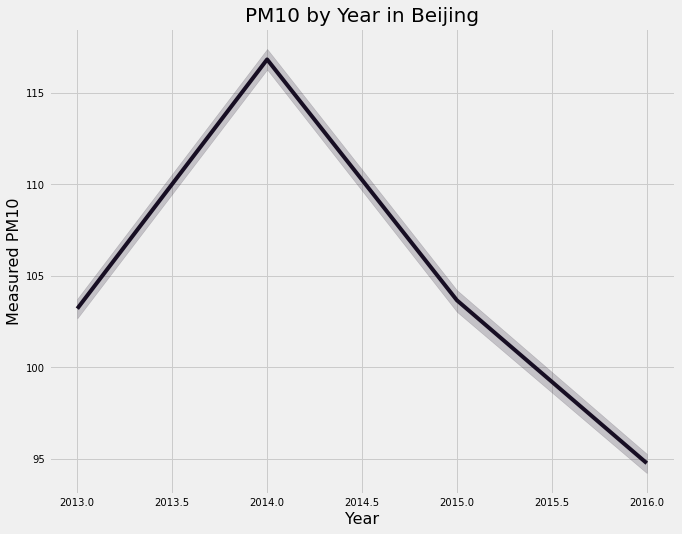

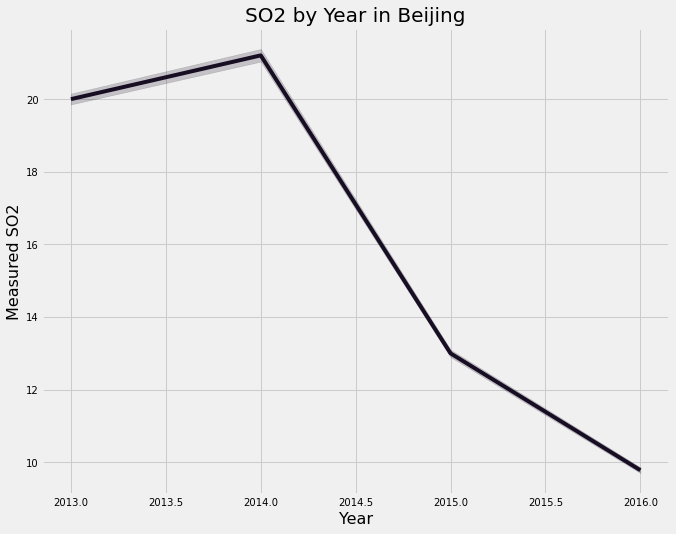

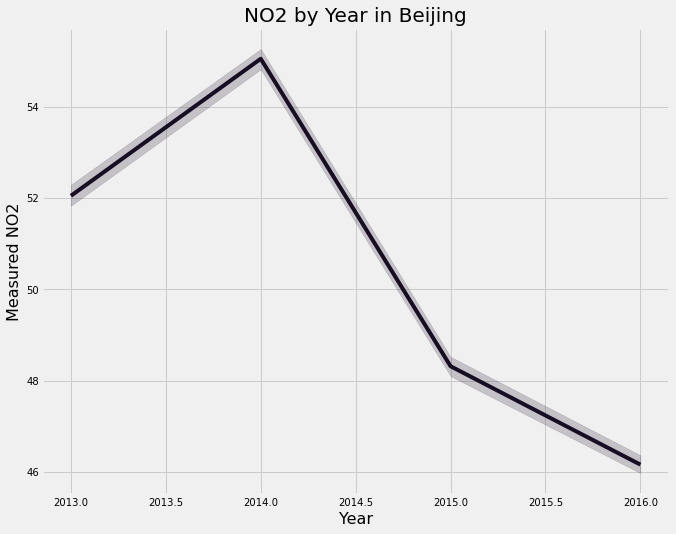

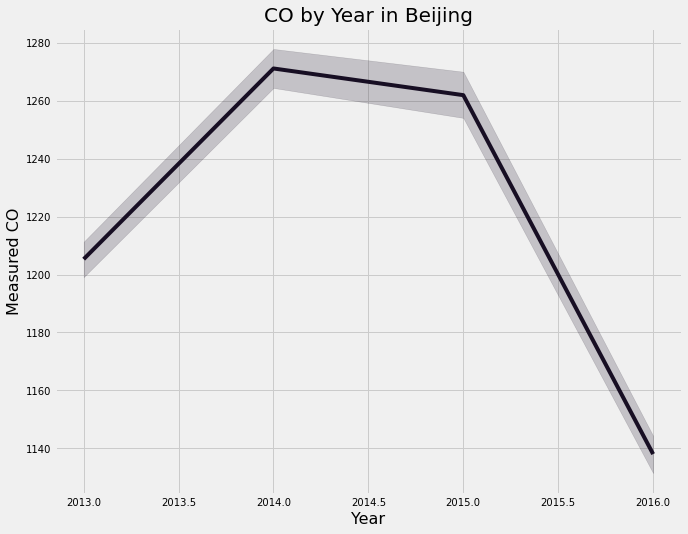

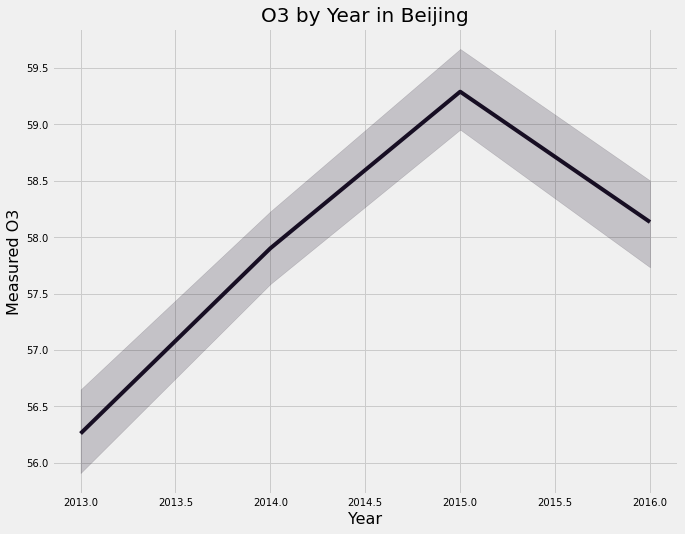

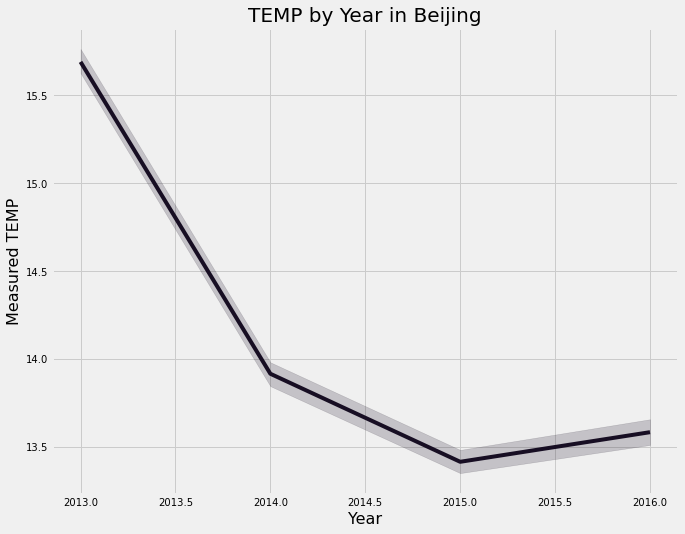

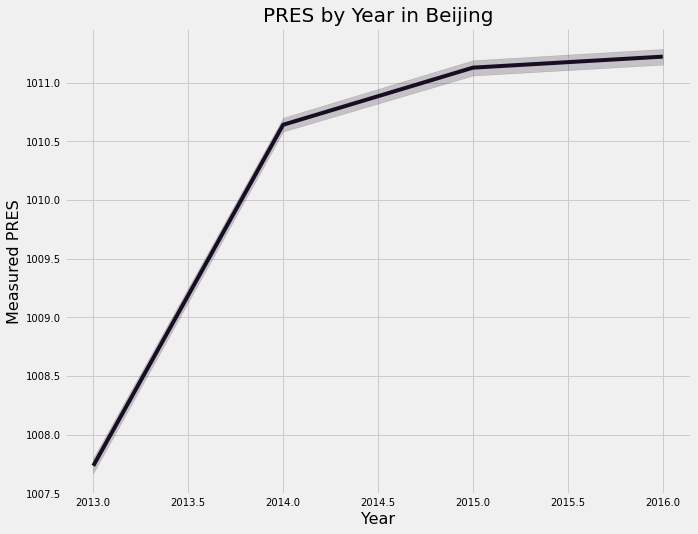

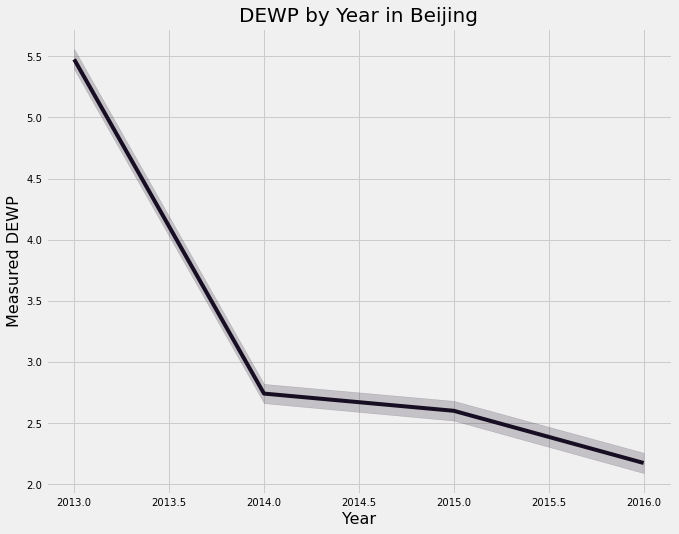

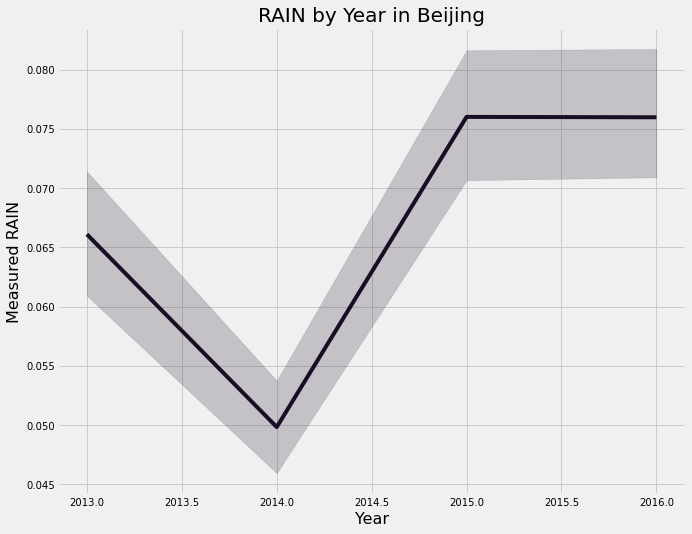

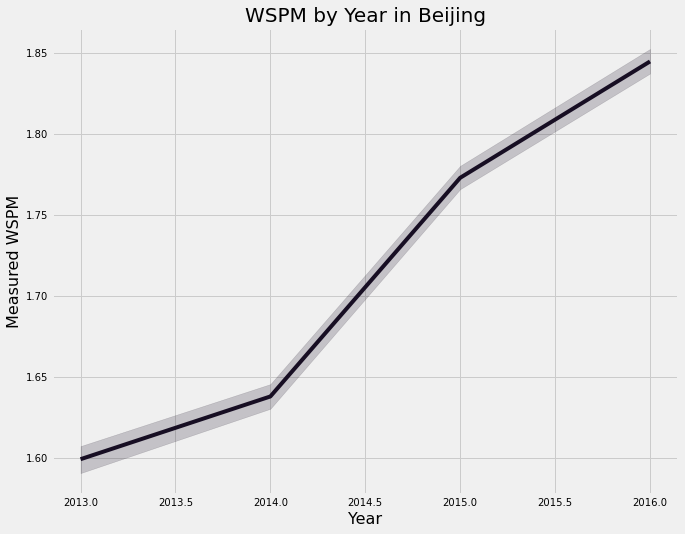

In [225]:
for f in features:
    fig, ax = plt.subplots(figsize=(10, 8))
    sns.lineplot(x = 'Year', y = f, data = df);
    plt.title(f + ' by Year in Beijing', size = 20)
    plt.xlabel('Year', size = 16)
    plt.ylabel('Measured ' + f, size = 16)
    plt.xticks(size = 10)
    plt.yticks(size = 10);


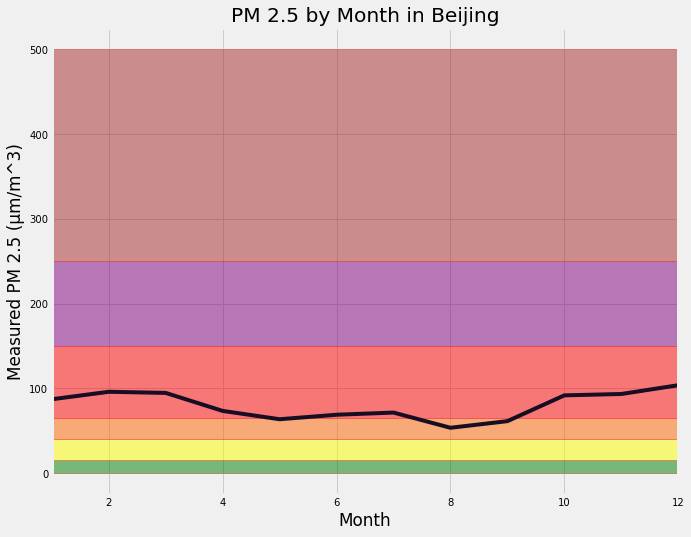

In [311]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.lineplot(x = 'Month', y = 'PM2.5', data = df);
ax.set(xlabel='Month',
       ylabel='Measured PM 2.5 (μm/m^3)',
       title='PM 2.5 by Month in Beijing',
       xlim=[1, 12])
plt.xticks(size = 10)
plt.yticks(size = 10)
fill([0,12,12,0], [0,0,15.4,15.4], 'green', alpha=0.5, edgecolor='r')
fill([0,12,12,0], [15.5,15.5,40.4,40.4], 'yellow', alpha=0.5, edgecolor='r')
fill([0,12,12,0], [40.5,40.5,65.4,65.4], '#ff6500', alpha=0.5, edgecolor='r')
fill([0,12,12,0], [65.5,65.5,150.4,150.4], 'red', alpha=0.5, edgecolor='r')
fill([0,12,12,0], [150.5,150.5,250.4,250.4], 'purple', alpha=0.5, edgecolor='r')
fill([0,12,12,0], [250.5,250.5,500.4,500.4], 'brown', alpha=0.5, edgecolor='r')

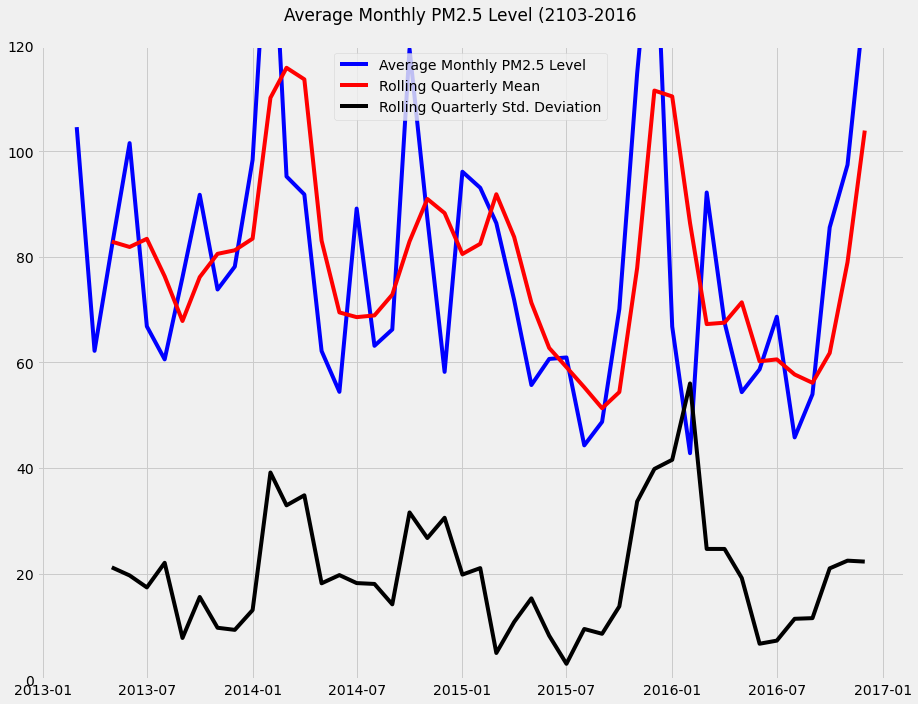

In [233]:
df_ = df['PM2.5'].resample('MS').mean()
#open_monthly_series = df.open

roll_mean = df_.rolling(window = 3).mean()
roll_std = df_.rolling(window = 3).std()


fig, ax = plt.subplots(figsize=(13, 10))
ax.plot(df_, color='blue',label='Average Monthly PM2.5 Level')
ax.plot(roll_mean, color='red', label='Rolling Quarterly Mean')
ax.plot(roll_std, color='black', label='Rolling Quarterly Std. Deviation')
ax.set_ylim(0, 120)
ax.legend()
fig.suptitle('Average Monthly PM2.5 Level (2103-2016')
fig.tight_layout()

In [239]:
from statsmodels.tsa.stattools import adfuller


test = adfuller(df_.rolling(window = 3).mean()[1:-1])
dfoutput = pd.Series(test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
print(dfoutput)

In [239]:
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(df['PM2.5'])

# Extract and display test results in a user friendly manner
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dftest)

print ('Results of Dickey-Fuller test: \n')

print(dfoutput)

(-51.567759998385924, 0.0, 96, 403679, {'1%': -3.4303661993603405, '5%': -2.8615471599228317, '10%': -2.566773810966036}, 3529901.428265695)
Results of Dickey-Fuller test: 

Test Statistic                    -51.567760
p-value                             0.000000
#Lags Used                         96.000000
Number of Observations Used    403679.000000
Critical Value (1%)                -3.430366
Critical Value (5%)                -2.861547
Critical Value (10%)               -2.566774
dtype: float64


In [259]:
df_diff = df[features].diff()

test = adfuller(df_diff['PM2.5'][1:])
dfoutput = pd.Series(test[0:4], index=['Test Statistic','p-value','#Lags Used',
                                       'Number of Observations Used'])
print(dfoutput)



Test Statistic                    -95.407897
p-value                             0.000000
#Lags Used                         96.000000
Number of Observations Used    403678.000000
dtype: float64


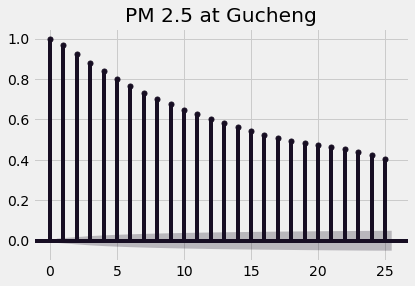

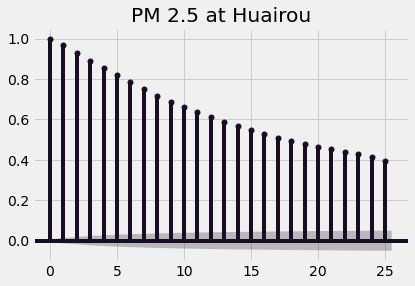

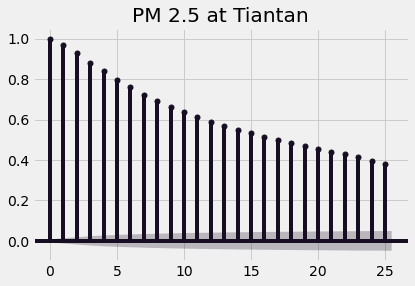

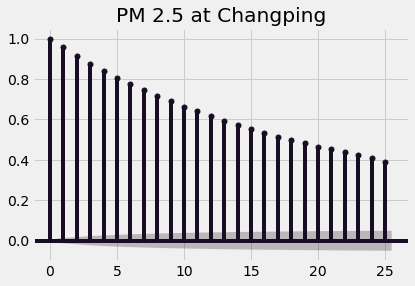

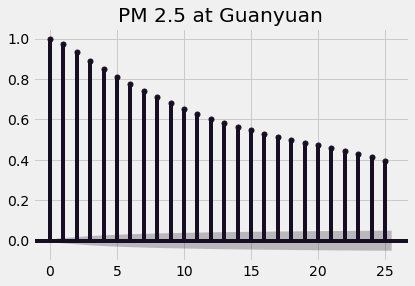

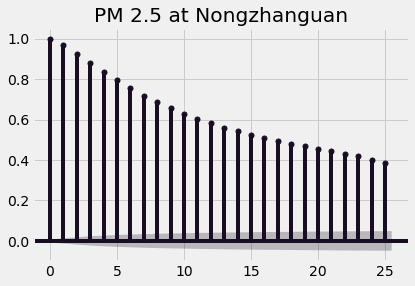

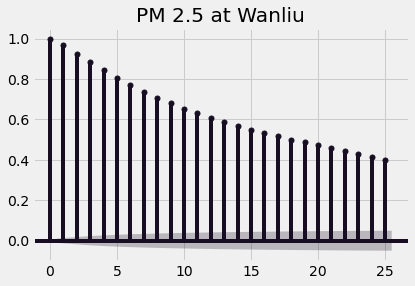

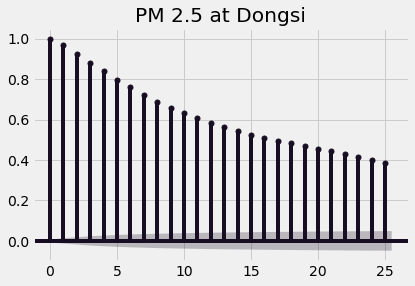

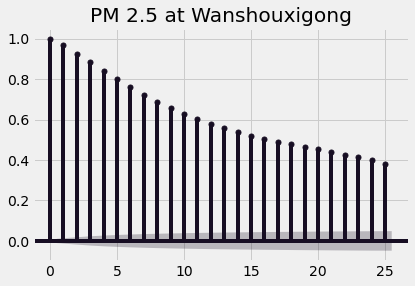

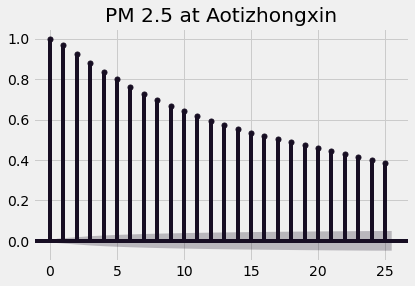

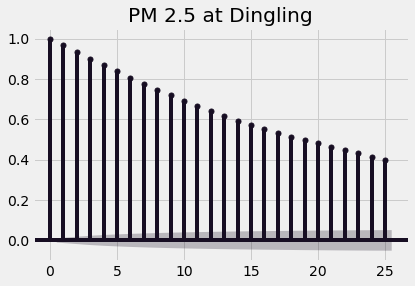

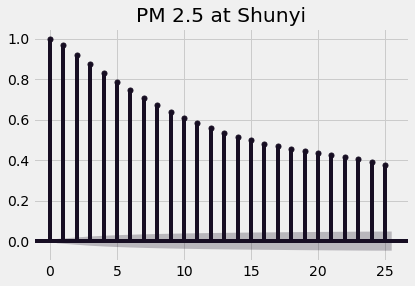

In [257]:
for x in stations:
    plot_acf(df[df['station'].eq(x)]["PM2.5"],lags=25, title = 'PM 2.5 at ' + x)
    plt.show()

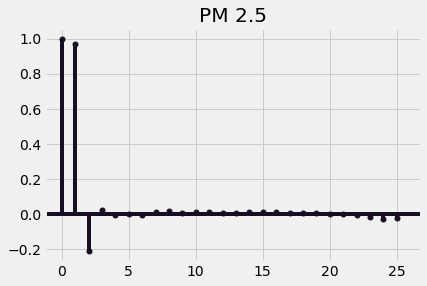

In [247]:
plot_pacf(df["PM2.5"],lags=25, title = 'PM 2.5')
plt.show()

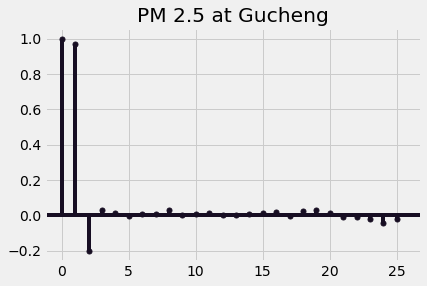

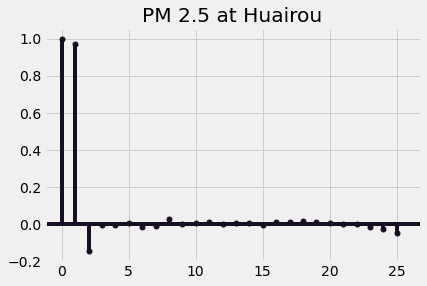

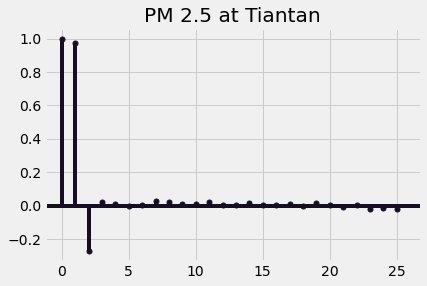

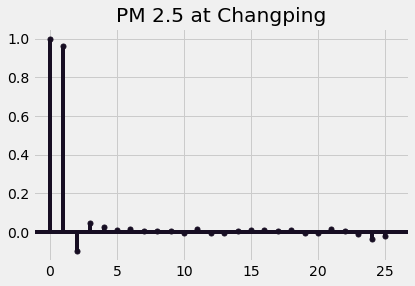

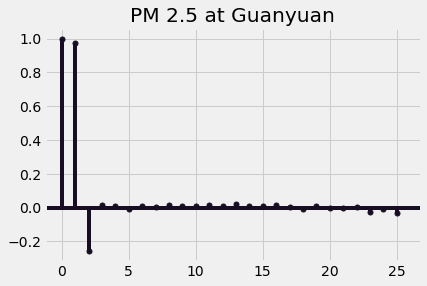

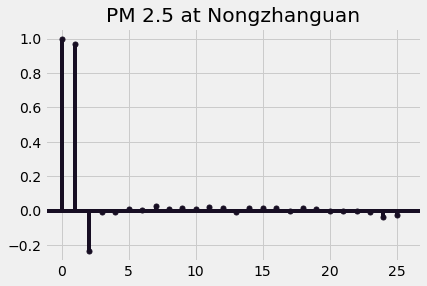

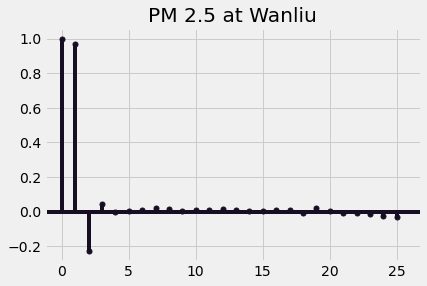

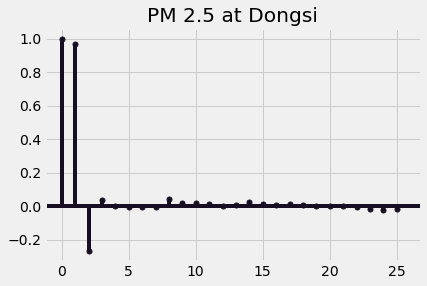

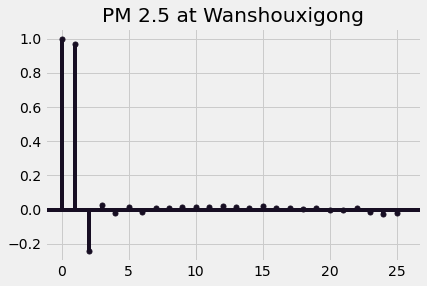

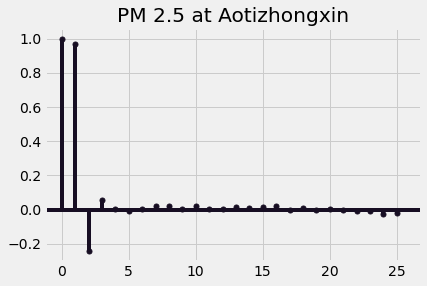

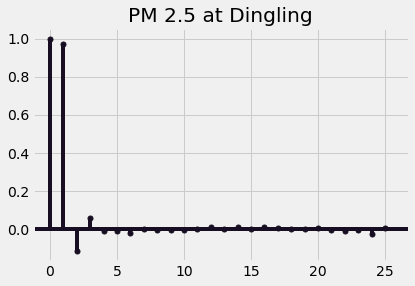

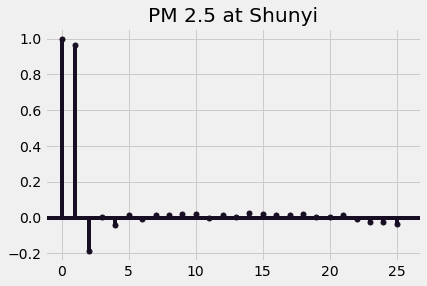

In [250]:
for x in stations:
    plot_pacf(df[df['station'].eq(x)]["PM2.5"],lags=25, title = 'PM 2.5 at ' + x)
    plt.show()

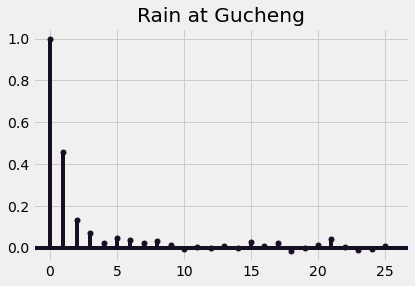

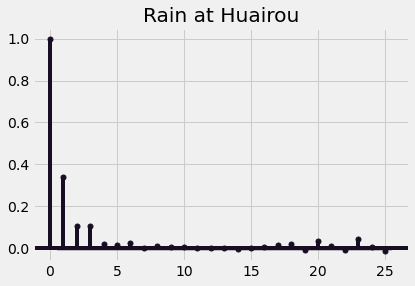

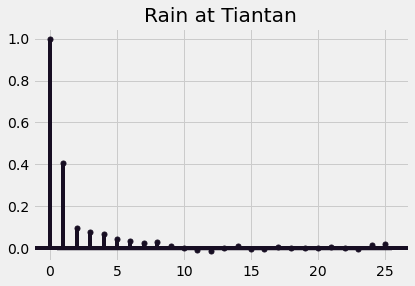

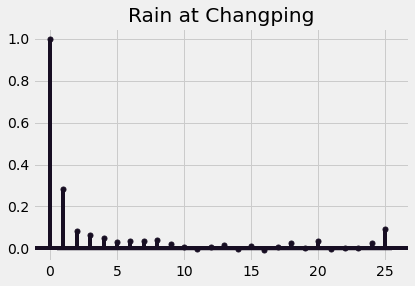

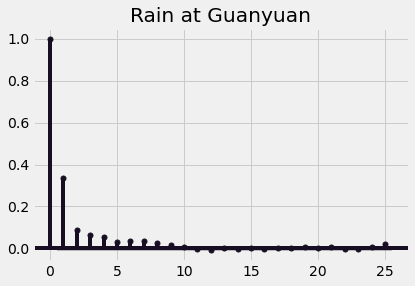

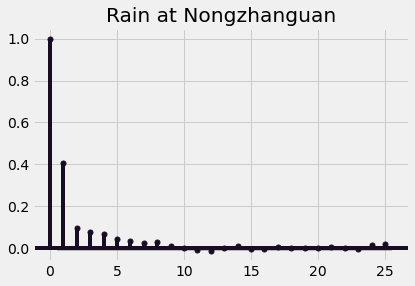

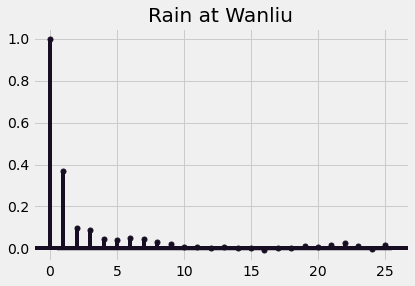

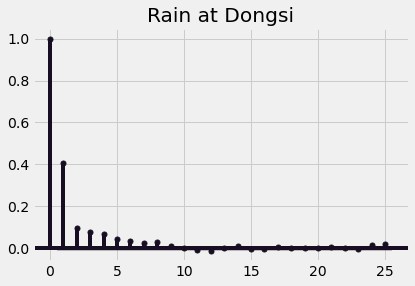

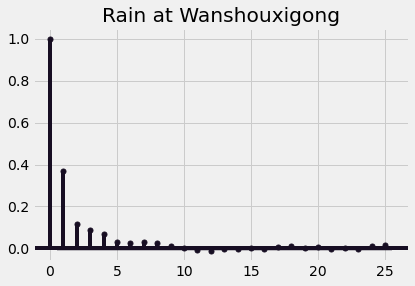

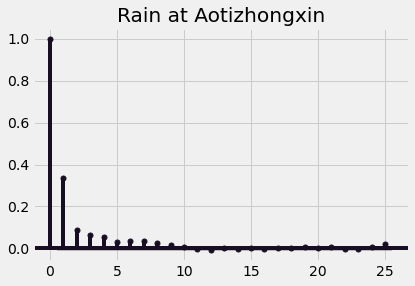

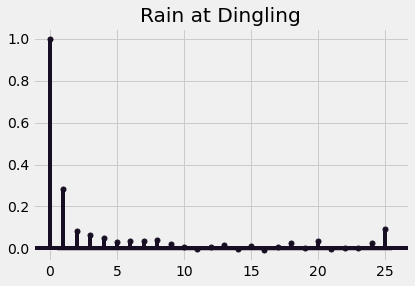

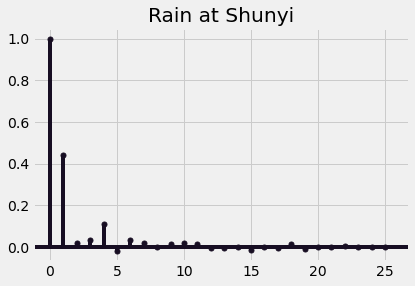

In [251]:
for x in stations:
    plot_pacf(df[df['station'].eq(x)]["RAIN"],lags=25, title = 'Rain at ' + x)
    plt.show()